## Exoplanet classification and research application with Machine Learning using Kepler Exoplanet Search Results

### Understanding the data

This machine learning project uses data furnished from Kaggle and NASA from the exoplanet search result at (https://wwww.kaggle.com/datasets/nasa/kepler-exoplanet-search-results).

This research includes data compiled from the Kepler Space Observatory since 2009 with approximately 10,000 exoplanet candidates.  Since October 2017, there have been 3000 confirmed exoplanet candidates.  The Kepler mission commenced as of the satellite observatory's launch since 2009 formally ending as of 2013 due to mechanical failures.  Kepler still remains active since 2014 on an extended K2 mission.

### Project Goals:

The goal of this project includes both an exploration of the Kepler exoplanet search results dataset and applying supervised machine learning techniques for classification of candidates utilizing pre-existing observation data and already completed exoplanet classification status.    

### Data Structure:
Kepler Exoplanet Search Results contains implicitly time-series data (e.g. koi_period) and non-sequential time-series observational data.  While the time-series data provides information about observed transit periodicity, the data series includes non-sequential observations with time of observation.  Consequently, our classification model can focus on individual observations while not requiring sequential time series methodologies.

For a full description of class labels, the following link provides this at:  
https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

The Kepler Exoplanet Search Result dataset is 3.7 Mb in size.

Let's load the libraries to be used.

In [1]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(os.getcwd()) #setting our current working directory to dataset

In [3]:
#load kepler dataset
df = pd.read_csv('cumulative.csv')  

Let's look at the first few lines of the dataset

In [4]:
df.head()

rowid     kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2      3  10811496  K00753.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  ...  \
0      1.000              0              0              0  ...   
1      0.969              0              0              0  ...   
2      0.000              0              1              0  ...   
3      0.000              0              1              0  ...   
4      1.000              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0           -81.0      4.467           0.064          -0.096     0.927   
1           -81.0      4.467           0.064          -0.096     0.927   
2          -176.0      4.544           0.044          -0.176     0.868   
3          -174.0      4.564           0.053          -0.168     0.791   
4          -211.0      4.438           0.070          -0.210     1.046   

   koi_srad_err1  koi_srad_err2         ra        dec  koi_kepmag  
0          0.105         -0.061  291.93423  48.141651      15.347  
1          0.105         -0.061  291.93423  48.141651      15.347  
2          0.233         -0.078  297.00482  48.134129      15.436  
3          0.201         -0.067  285.53461  48.285210      15.597  
4          0.334         -0.133  288.75488  48.226200      15.509  

[5 rows x 50 columns]

Let's display some basic info

In [5]:
print('Basic Info:')
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_

#### Missing Values

In [6]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     

#### Highlights of Missing Values
There are 9564 missing values from columns 'koi_teq_err1' and 'koi_teq_err2' in our rowset.  This tells us that imputation or removing rows is not useful since there isn't enough data to impute, and dropping such rows leave little data left, so we can drop these columns altogether.  

#### Dropping Data Leaks
Attributes like 'kepler_name', 'koi_score', and 'koi_tce_dlivname' and 'koi_pdisposition' represent data leaks since they may continue information that implicitly or explictly suggest a candidate has been 'confirmed'.  It is important to eliminate these variables since they would could influence the outcome of classification with prior knowledge of the reult. 

Nonetheless, we may omit the use of feature flags in this study potentially on the premise of avoiding potential data leak issues.  We ultimately want to use observation and inferred observation data that does not suggest immediately a ready-made result.  

#### Dropping unneeded features for the scope of this project
we will also drop everything else but the following:
- koi_disposition
- koi_period
- koi_impact
- koi_duration
- koi_depth
- koi_prad
- koi_teq
- koi_insol
- koi_steff
- koi_slogg
- koi_srad
- koi_kepmag
Since these features are implicit or explict observations of the transits,
we will otherwise omit features like error attached to these observations


In [7]:
col_list = ['koi_disposition','koi_period','koi_impact','koi_duration','koi_depth','koi_prad','koi_teq','koi_insol','koi_steff','koi_slogg','koi_srad','koi_kepmag']
filtered_df = df[col_list]

#### Descriptive Statistics

In [8]:
print("Descriptive Statistics:")
print(filtered_df.describe(include='all'))

Descriptive Statistics:
       koi_disposition     koi_period   koi_impact  koi_duration  \
count             9564    9564.000000  9201.000000   9564.000000   
unique               3            NaN          NaN           NaN   
top     FALSE POSITIVE            NaN          NaN           NaN   
freq              5023            NaN          NaN           NaN   
mean               NaN      75.671358     0.735105      5.621606   
std                NaN    1334.744046     3.348832      6.471554   
min                NaN       0.241843     0.000000      0.052000   
25%                NaN       2.733684     0.197000      2.437750   
50%                NaN       9.752831     0.537000      3.792600   
75%                NaN      40.715178     0.889000      6.276500   
max                NaN  129995.778400   100.806000    138.540000   

           koi_depth       koi_prad       koi_teq     koi_insol     koi_steff  \
count   9.201000e+03    9201.000000   9201.000000  9.243000e+03   9201.000000 

#### Filtering for Target Classifications
There are two candidate types we want to apply supervised machine learning classification:
- CONFIRMED
- FALSE POSITIVE

In [9]:
filtered_df = filtered_df[filtered_df['koi_disposition'].isin(['CONFIRMED','FALSE POSITIVE'])]

Let's use KNNImputer to find nearest neighbor points to fill in missing values

In [10]:
cols_to_impute = ['koi_impact','koi_depth','koi_srad','koi_steff','koi_slogg','koi_insol','koi_prad','koi_teq','koi_kepmag']

#Extract cols to cols_to_impute
df_to_impute = filtered_df[cols_to_impute]

#Standardize data for KNN
scaler = StandardScaler()
scaled_dat = scaler.fit_transform(df_to_impute)

#Apply KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_dat = knn_imputer.fit_transform(scaled_dat)

#Inverse scale 
imputed_dat_original_scale = scaler.inverse_transform(imputed_dat)

#replace cols with impute vals
filtered_df[cols_to_impute] = imputed_dat_original_scale

In [11]:
print(filtered_df.isnull().sum())
filtered_df = filtered_df.reset_index()
filtered_df.head()

koi_disposition    0
koi_period         0
koi_impact         0
koi_duration       0
koi_depth          0
koi_prad           0
koi_teq            0
koi_insol          0
koi_steff          0
koi_slogg          0
koi_srad           0
koi_kepmag         0
dtype: int64


index koi_disposition  koi_period  koi_impact  koi_duration  koi_depth  \
0      0       CONFIRMED    9.488036       0.146       2.95750      615.8   
1      1       CONFIRMED   54.418383       0.586       4.50700      874.8   
2      2  FALSE POSITIVE   19.899140       0.969       1.78220    10829.0   
3      3  FALSE POSITIVE    1.736952       1.276       2.40641     8079.2   
4      4       CONFIRMED    2.525592       0.701       1.65450      603.3   

   koi_prad  koi_teq  koi_insol  koi_steff  koi_slogg  koi_srad  koi_kepmag  
0      2.26    793.0      93.59     5455.0      4.467     0.927      15.347  
1      2.83    443.0       9.11     5455.0      4.467     0.927      15.347  
2     14.60    638.0      39.30     5853.0      4.544     0.868      15.436  
3     33.46   1395.0     891.96     5805.0      4.564     0.791      15.597  
4      2.75   1406.0     926.16     6031.0      4.438     1.046      15.509

In [12]:
attrbs = [
    'koi_period', 'koi_duration', 'koi_steff',
    'koi_impact', 'koi_slogg', 'koi_depth', 'koi_prad', 'koi_teq',
    'koi_insol', 'koi_srad', 'koi_kepmag'
]

for attr in attrbs:
    # Calculate the mean and standard deviation
    mean = df[attr].mean()
    std = df[attr].std()
    
    # Define the 95% confidence interval
    lower_bound = mean - 1.96 * std
    upper_bound = mean + 1.96 * std
    filtered_df = filtered_df[(filtered_df[attr] >= lower_bound) | (filtered_df[attr] <= upper_bound)]

In [13]:
alt.data_transformers.enable('default')  
alt.data_transformers.disable_max_rows()  #ensure that max_row() is disabled otherwise plot rendering won't work for this dataset

DataTransformerRegistry.enable('default')

#### Exploratory Data Analysis Visualizations 

In [14]:
attrbs = [
    'koi_period', 'koi_duration', 'koi_steff',
    'koi_impact', 'koi_slogg', 'koi_depth', 'koi_prad', 'koi_teq',
    'koi_insol', 'koi_srad', 'koi_kepmag'
]

charts = []
for attr in attrbs:
    chart = alt.Chart(filtered_df).mark_bar().encode(
        alt.X(attr, bin=alt.Bin(maxbins=30), title=f'{attr} (Binned)'),
        alt.Y('count()', title='Frequency')
    ).properties(
        title=f'Histogram of {attr}',
        width=200,
        height=200
    )
    charts.append(chart)
#arrangecharts
grid_chart = alt.concat(*charts,columns=3)

grid_chart

alt.ConcatChart(...)

![Alt Text](visualization.png)

Let's look at pair plots

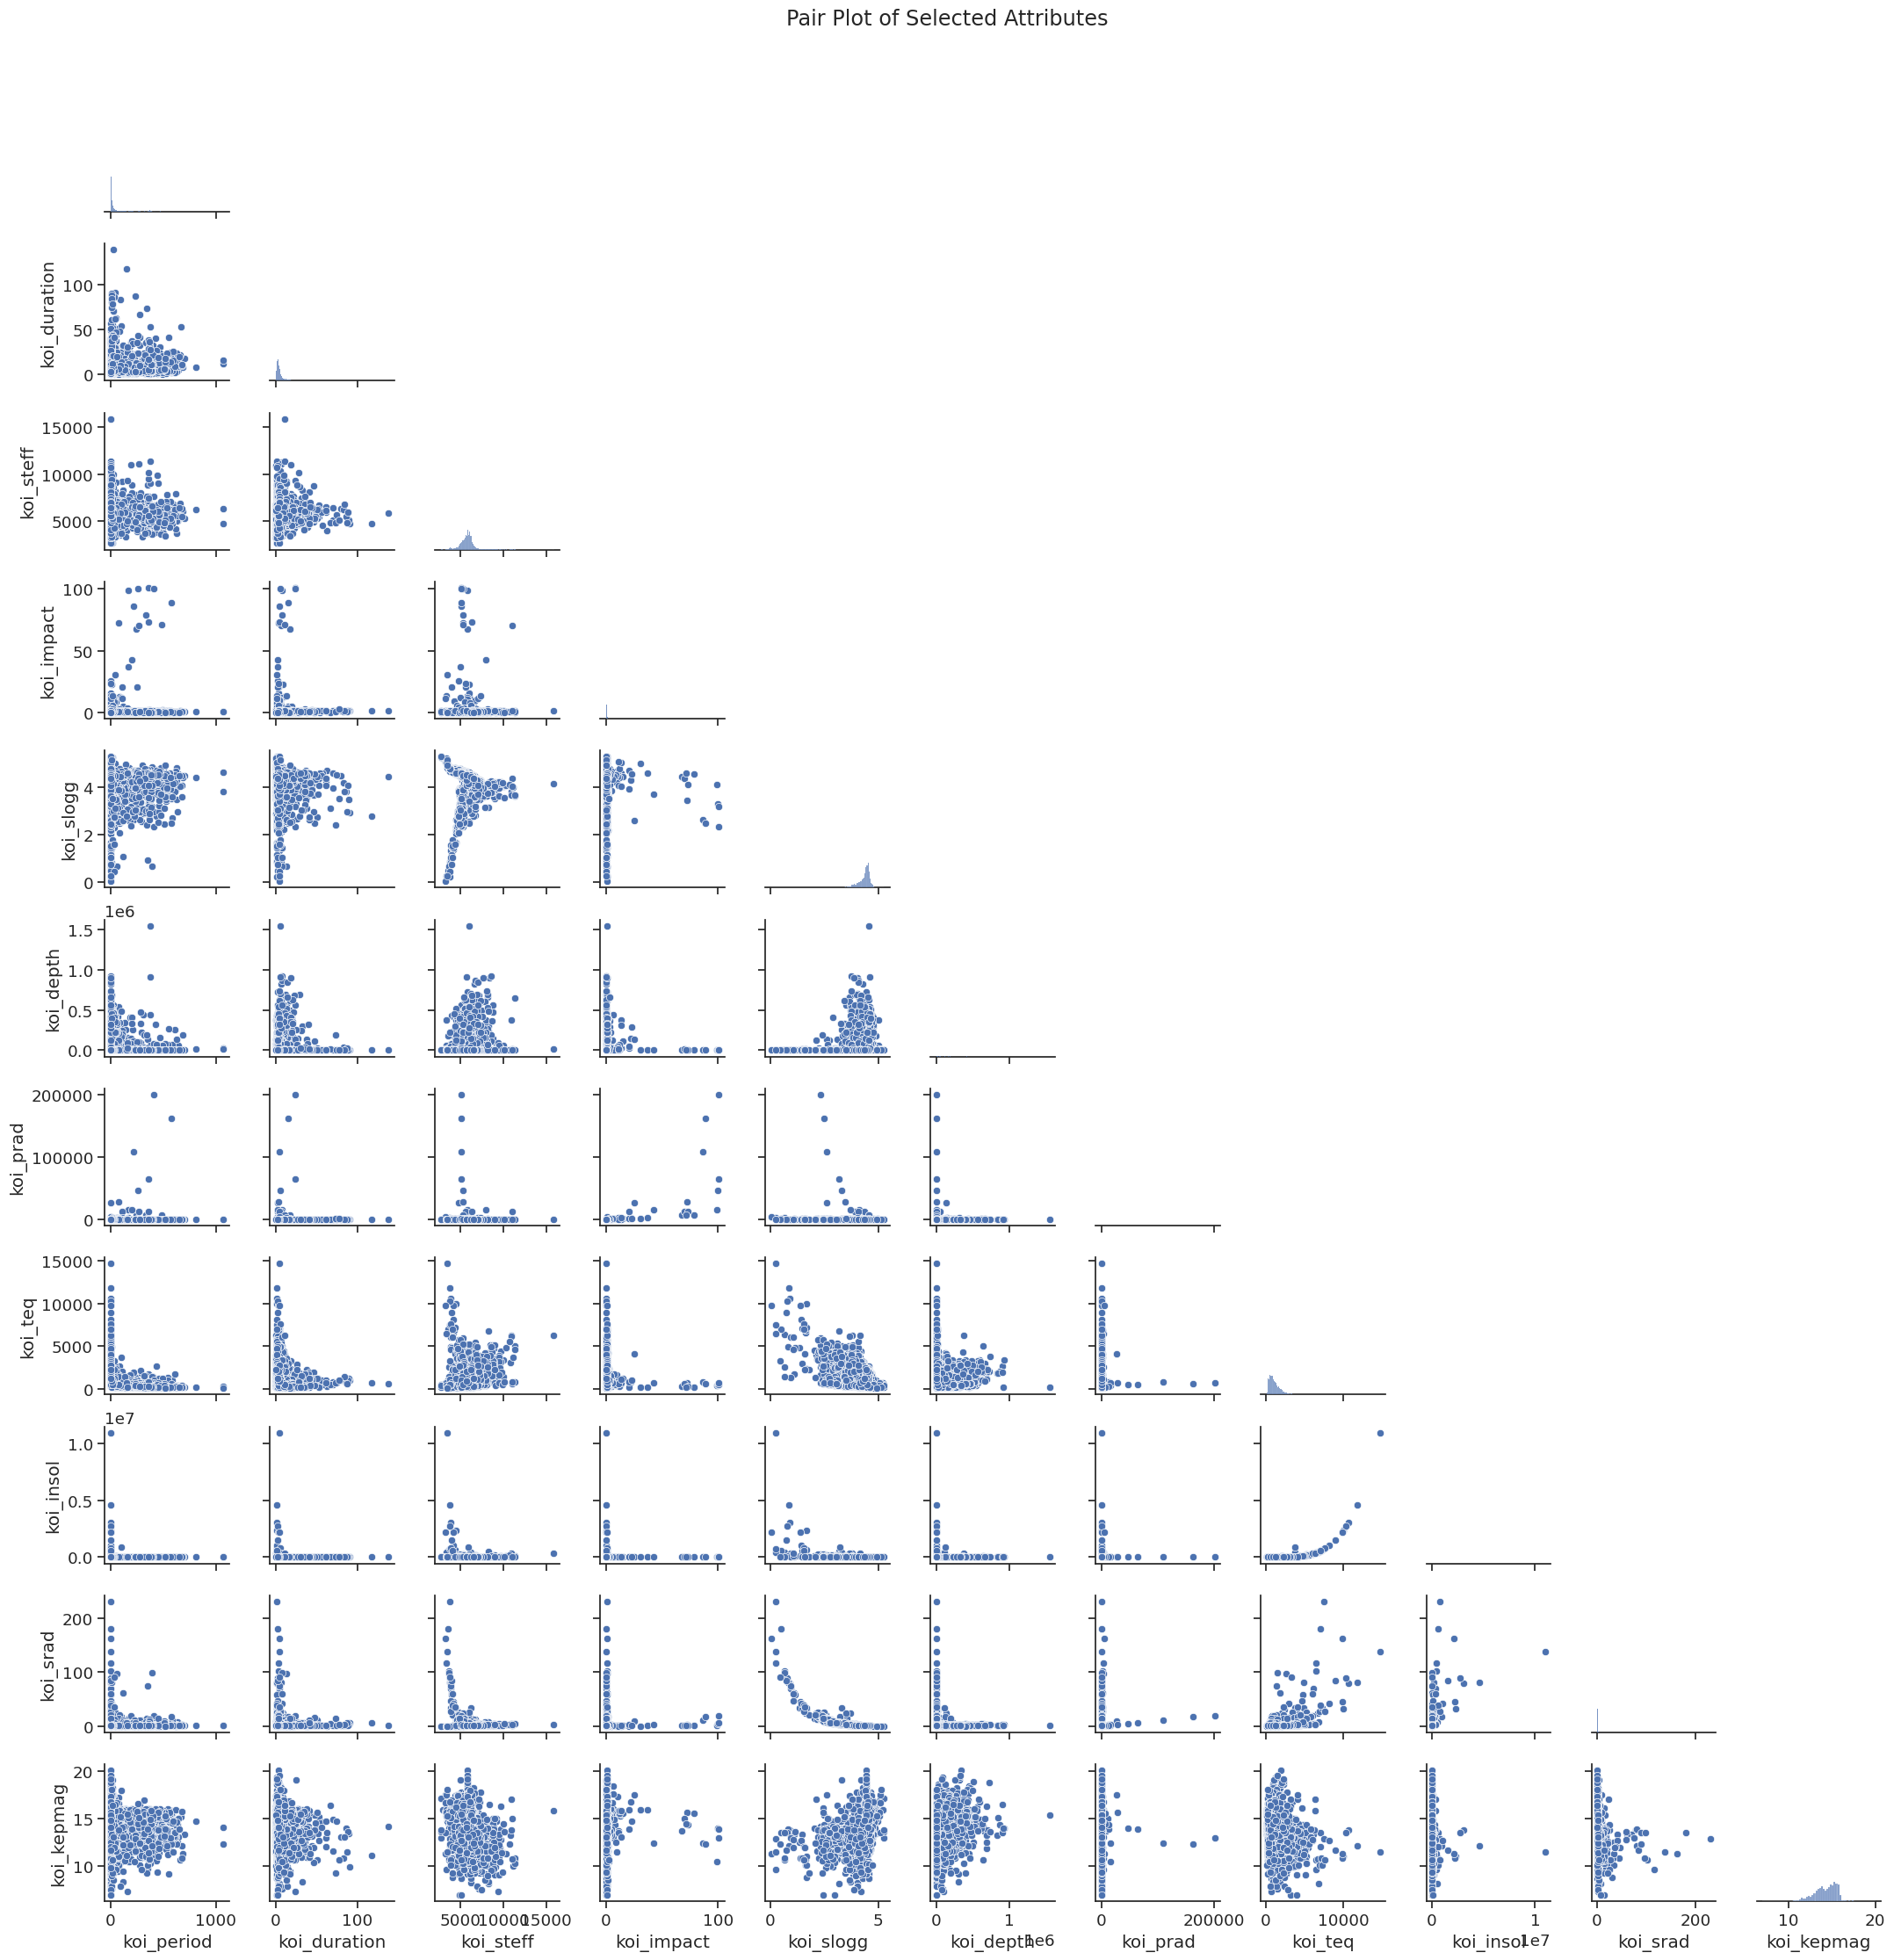

In [15]:
pplot_df = filtered_df[attrbs]
sns.set(style='ticks', font_scale=1.2)
pair_plot = sns.pairplot(pplot_df, diag_kind='hist', corner=True,height=2)

#title
pair_plot.fig.suptitle('Pair Plot of Selected Attributes', y=1.02)

plt.show()

In [15]:
# Correlation matrix
attrbs = [
    'koi_period', 'koi_duration', 'koi_steff',
    'koi_impact', 'koi_slogg', 'koi_depth', 'koi_prad', 'koi_teq',
    'koi_insol', 'koi_srad', 'koi_kepmag'
]
pplot_df = filtered_df[attrbs]
corr_matrix = pplot_df.corr()

print(corr_matrix)

              koi_period  koi_duration  koi_steff  koi_impact  koi_slogg  \
koi_period      1.000000      0.302982   0.013667    0.066378  -0.037030   
koi_duration    0.302982      1.000000   0.089395    0.036828  -0.105220   
koi_steff       0.013667      0.089395   1.000000    0.011415  -0.139900   
koi_impact      0.066378      0.036828   0.011415    1.000000  -0.065236   
koi_slogg      -0.037030     -0.105220  -0.139900   -0.065236   1.000000   
koi_depth      -0.074091      0.059898   0.119111    0.000234  -0.006304   
koi_prad        0.069378      0.036946  -0.016082    0.695109  -0.106359   
koi_teq        -0.385992     -0.194702   0.260691   -0.018989  -0.547560   
koi_insol      -0.024288     -0.019006  -0.055304   -0.004586  -0.294429   
koi_srad        0.002655      0.008333  -0.116602    0.025926  -0.652306   
koi_kepmag     -0.038477     -0.092052  -0.333635   -0.007973   0.481135   

              koi_depth  koi_prad   koi_teq  koi_insol  koi_srad  koi_kepmag  
koi_peri

#### Feature Engineering
Dropping highly correlated featues (if applicable)

In [16]:
#make sure only to include needed columns found in numerical_columns
numerical_columns = [
    'koi_disposition', 'koi_period', 'koi_duration', 'koi_steff', 'koi_impact', 
    'koi_slogg', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_srad', 'koi_kepmag'
]

#Filter df for selected num cols
filtered_df = filtered_df[numerical_columns]

#threshold for dropping a feature
corr_threshold = .8

#mask to track feats to keep/drop
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape),k=1).astype(bool)
)
#cols to drop based on threshold
to_drop = [
    col for col in upper_triangle.columns
    if any(upper_triangle[col].abs()>corr_threshold)
]

#Filter df dropping feats
filtered_df_reduced = filtered_df.drop(columns=to_drop)

#output filtered df and dropped feats
print('Dropped features due to high correlation:', to_drop)
print('Remaining features:', filtered_df_reduced.columns.tolist())

Dropped features due to high correlation: []
Remaining features: ['koi_disposition', 'koi_period', 'koi_duration', 'koi_steff', 'koi_impact', 'koi_slogg', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_srad', 'koi_kepmag']


#### Summary of EDA (Feature Engineering)

Using a correlation threshold of .8, we find that there aren't any features (list above) above the correlation threshold (positive or negative) for removal. While see some closer relationship of some feature variables compared to others, these relationships aren't strong enough to warrant dimensionality reduction for such features.  We can discuss further feature importance as we explore model development and feature importance scoring that would subsequently describe such in detail.  The core features to be used here are:  'koi_disposition', 'koi_period', 'koi_duration', 'koi_steff', 'koi_impact', 
    'koi_slogg', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_srad', 'koi_kepmag' while 'koi_disposition' is the target feature to be used. Since there are no added features to be dropped within filtered_df for the features to be used in model, we will continue to use filtered_df.

Let's encode or label for 'koi_disposition' as a setup for our logistic model. Encoding is useful to us since this provides 
a binary numeric representation for the examined "CONFIRMED" and "FALSE POSITIVE" attributes of the koi_predisposition archive.  Encoding categorical variables helps our machine learning model process a given feature label more effectively.  

In preparation for supervised classification, let's go ahead and encode 'koi_disposition' between binary outcomes
to facilitate better handling for our classifiers.

In [22]:
from sklearn.preprocessing import LabelEncoder

#unique classes in target var
print('Unique target values  before encoding:', filtered_df['koi_disposition'].unique())

label_encoder = LabelEncoder()

#encode target var
filtered_df['koi_disposition'] = label_encoder.fit_transform(filtered_df['koi_disposition'])

#map check
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print('Target encoding mapping:', label_mapping)

#confirm
print('Unique target values after encoding:', filtered_df['koi_disposition'].unique())

Unique target values  before encoding: ['CONFIRMED' 'FALSE POSITIVE']
Target encoding mapping: {'CONFIRMED': np.int64(0), 'FALSE POSITIVE': np.int64(1)}
Unique target values after encoding: [0 1]


#### Model

Let's first use a logistic regression model on the selected features from our correlation matrix.

Accuracy: 0.8367486338797814

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       510
           1       0.88      0.87      0.87       954

    accuracy                           0.84      1464
   macro avg       0.82      0.82      0.82      1464
weighted avg       0.84      0.84      0.84      1464

ROC-AUC Score: 0.9026051301023554


/home/christopher/supervised_ml_rproj/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


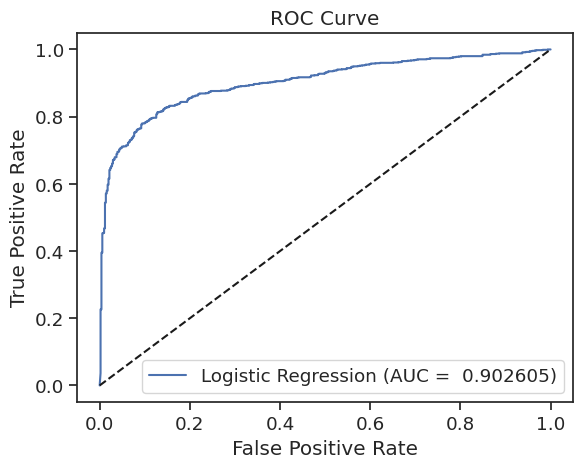

In [19]:
from sklearn.linear_model import LogisticRegression

# loading data
X = filtered_df.drop(columns=['koi_disposition'])
y = filtered_df['koi_disposition']

#split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2,random_state=42)

#fit lgrm
model = LogisticRegression(random_state=42, max_iter=5000)
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1] # Prob for pos class

#evaluate
print('Accuracy:', accuracy_score(y_test,y_pred))
print('\nClassification Report:\n', classification_report(y_test,y_pred))

#evaluate roc-auc 
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score:', roc_auc)

#plot roc curve

fpr,tpr,_ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr, label=f'Logistic Regression (AUC = {roc_auc: 2f})')
plt.plot([0,1], [0,1], 'k--') #Diag line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Random Forest classifier

Accuracy: 0.8968579234972678

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       510
           1       0.91      0.93      0.92       954

    accuracy                           0.90      1464
   macro avg       0.89      0.88      0.89      1464
weighted avg       0.90      0.90      0.90      1464

ROC-AUC Score: 0.9619157725983475


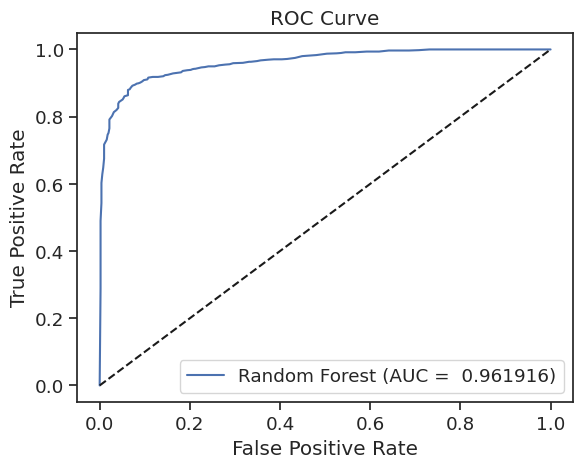

Feature Importances:
         Feature  Importance
6       koi_prad    0.193920
0     koi_period    0.120466
5      koi_depth    0.113402
8      koi_insol    0.106426
3     koi_impact    0.100017
1   koi_duration    0.090658
7        koi_teq    0.074859
2      koi_steff    0.056074
9       koi_srad    0.049075
4      koi_slogg    0.048487
10    koi_kepmag    0.046615


In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1] # Prob for pos class

#evaluate
print('Accuracy:', accuracy_score(y_test,y_pred))
print('\nClassification Report:\n', classification_report(y_test,y_pred))

#evaluate roc-auc 
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score:', roc_auc)

#plot roc curve

fpr,tpr,_ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr, label=f'Random Forest (AUC = {roc_auc: 2f})')
plt.plot([0,1], [0,1], 'k--') #Diag line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#Feature Importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print('Feature Importances:')
print(importance_df)

#### Random Forest with GridSearchCV 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Accuracy: 0.9009562841530054

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       510
           1       0.92      0.93      0.92       954

    accuracy                           0.90      1464
   macro avg       0.89      0.89      0.89      1464
weighted avg       0.90      0.90      0.90      1464

ROC-AUC Score: 0.9628725284663132


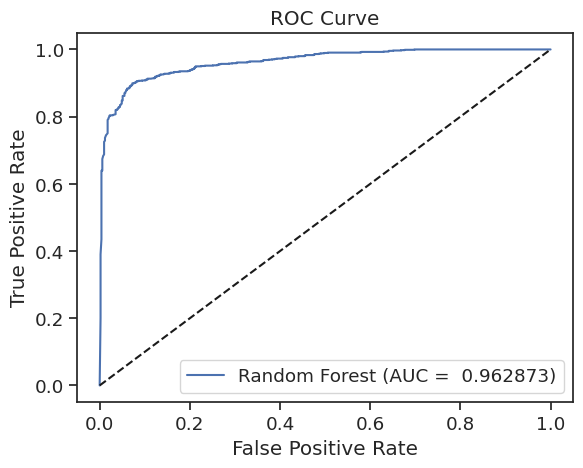

In [21]:
from sklearn.model_selection import RandomizedSearchCV

#define param grid
param_grid = {
    'n_estimators':[100,200,300], #num of trees
    'max_depth': [10,20,None],  # max trees depth
    'min_samples_split':[2,5,10],  # min samples req to split a node
    'min_samples_leaf': [1,2,4],  # Min samples req at a leaf node
    'max_features': ['sqrt','log2', None] # num features to consider for best split
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20, #eval only 20 rand combinations
    scoring='roc_auc',
    cv=3,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train,y_train)
print('Best Parameters:', random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:,1] # Prob for pos class 

#evaluate
print('Accuracy:', accuracy_score(y_test,y_pred))
print('\nClassification Report:\n', classification_report(y_test,y_pred))

#evaluate roc-auc 
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score:', roc_auc)

#plot roc curve

fpr,tpr,_ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr, label=f'Random Forest (AUC = {roc_auc: 2f})')
plt.plot([0,1], [0,1], 'k--') #Diag line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Gradient Boosting

Accuracy: 0.8941256830601093

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       510
           1       0.92      0.92      0.92       954

    accuracy                           0.89      1464
   macro avg       0.88      0.88      0.88      1464
weighted avg       0.89      0.89      0.89      1464

ROC-AUC Score: 0.9575708061002179


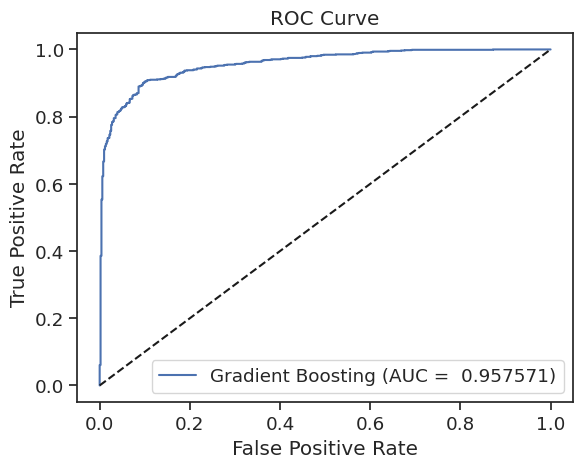

Feature Importances:
         Feature  Importance
6       koi_prad    0.361466
0     koi_period    0.281544
5      koi_depth    0.101924
8      koi_insol    0.067091
1   koi_duration    0.061263
3     koi_impact    0.043872
2      koi_steff    0.026944
10    koi_kepmag    0.020989
4      koi_slogg    0.018476
9       koi_srad    0.014362
7        koi_teq    0.002071


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100,learning_rate=.1,max_depth=3,random_state=42)
model.fit(X_train,y_train)

#predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1] # Prob for pos class

#evaluate
print('Accuracy:', accuracy_score(y_test,y_pred))
print('\nClassification Report:\n', classification_report(y_test,y_pred))

#evaluate roc-auc 
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score:', roc_auc)

#plot roc curve

fpr,tpr,_ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr, label=f'Gradient Boosting (AUC = {roc_auc: 2f})')
plt.plot([0,1], [0,1], 'k--') #Diag line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#Feature Importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print('Feature Importances:')
print(importance_df)

#### Gradient Boosting with GridSearchCV

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9132513661202186

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       510
           1       0.94      0.93      0.93       954

    accuracy                           0.91      1464
   macro avg       0.90      0.91      0.90      1464
weighted avg       0.91      0.91      0.91      1464

ROC-AUC Score: 0.9675155177374934


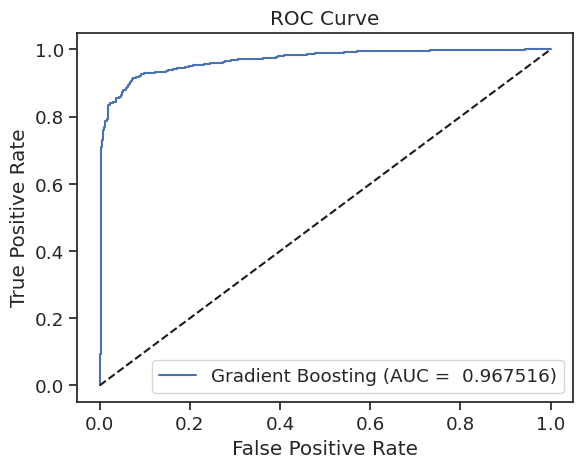

Feature Importances:
         Feature  Importance
6       koi_prad    0.291884
0     koi_period    0.221525
5      koi_depth    0.104298
8      koi_insol    0.091572
1   koi_duration    0.077288
3     koi_impact    0.065220
10    koi_kepmag    0.040296
2      koi_steff    0.039252
4      koi_slogg    0.036928
9       koi_srad    0.022254
7        koi_teq    0.009483


In [23]:
#tuner
param_grid = {
    'n_estimators': [100,200],
    'learning_rate': [.05,0.1],
    'max_depth': [3,5],
    'subsample':[.8],
    'min_samples_split':[5,10]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=param_grid, scoring='roc_auc', cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:,1] # Prob for pos class 

#evaluate
print('Accuracy:', accuracy_score(y_test,y_pred))
print('\nClassification Report:\n', classification_report(y_test,y_pred))

#evaluate roc-auc 
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score:', roc_auc)

#plot roc curve

fpr,tpr,_ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr, label=f'Gradient Boosting (AUC = {roc_auc: 2f})')
plt.plot([0,1], [0,1], 'k--') #Diag line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#Feature Importance
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print('Feature Importances:')
print(importance_df)

#### SVM with GridSearchCV

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.860655737704918

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       510
           1       0.90      0.89      0.89       954

    accuracy                           0.86      1464
   macro avg       0.85      0.85      0.85      1464
weighted avg       0.86      0.86      0.86      1464

ROC-AUC Score: 0.9382835943601758


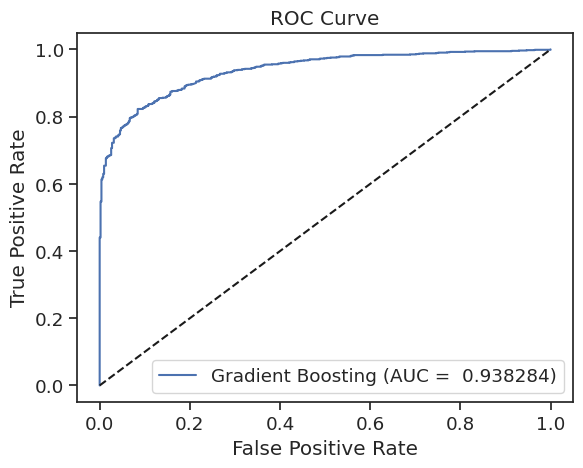

[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.954 total time=   1.2s
[CV 2/3] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.954 total time=  13.2s
[CV 3/3] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.955 total time=   8.5s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.962 total time=   3.2s
[CV 1/3] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.961 total time=   4.6s
[CV 2/3] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.953 total time=   4.6s
[CV 3/3] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.958 total time=   6.2s
[CV 1/3] END max_depth=None, m

In [24]:
from sklearn.svm import SVC

#normalize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#def param grid 
param_grid = {
    'C': [1, 10, 100], #regularization param
    'gamma': [.01],  #kernel coeff 
    'kernel': ['rbf'] 
}

#init GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=3,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

#evaluate
print('Best Parameters:', grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:,1] # Prob for pos class 

#evaluate
print('Accuracy:', accuracy_score(y_test,y_pred))
print('\nClassification Report:\n', classification_report(y_test,y_pred))

#evaluate roc-auc 
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score:', roc_auc)

#plot roc curve

fpr,tpr,_ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr, label=f'Gradient Boosting (AUC = {roc_auc: 2f})')
plt.plot([0,1], [0,1], 'k--') #Diag line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Highlight Summary and Analysis

From the results and analysis above we can see that Gradient Boosting with GridSearchCV produced the best results.  

Classification Report:

Accuracy: 0.91
ROC-AUC Score: 0.97

| Metric          | Class 0 | Class 1 | Accuracy | Macro Avg | Weighted Avg |
|-----------------|---------|---------|----------|-----------|--------------|
| Precision       | 0.87    | 0.94    | -        | 0.90      | 0.91         |
| Recall          | 0.88    | 0.92    | -        | 0.91      | 0.91         |
| F1-Score        | 0.87    | 0.93    | 0.91     | 0.90      | 0.91         |
| Support         | 510     | 954     | 1464     | 1464      | 1464         |

##### Feature Importances 

| Feature       | Importance |
|---------------|------------|
| koi_prad      | 0.291884   |
| koi_period    | 0.221525   |
| koi_depth     | 0.104298   | 
| koi_insol     | 0.091572   |
| koi_duration  | 0.077288   | 
| koi_impact    | 0.067611   |
| koi_kepmag    | 0.040296   |
| koi_steff     | 0.039252   |
| koi_slogg     | 0.036928   | 
| koi_srad      | 0.022254   |
| koi_teq       | 0.009483   |

A more detailed description for some of the feature importances are as follows:
- koi_prad is the radius of the planet. Planetary raidus is the product of the planet star radius ratio and the stellar radius.
- koi_period is the time interval (days) between consecutive planetary transits.
- koi_depth is the fraction of stellar flux lost at the minimum of the planetary transit.  Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.
- koi_duration is the duration (hours) of the observed transit.  Duration is measured from first contact between the planet and star until last contact.  Contact times are typically computed from a best-fit model produced by a Mandel-Algol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbitaal ephemeris.  (citation:  DOI 10.26133/NEA4)

##### Discussion and Results

The top feature importances align intuitively with the relationship between light flux during a transit and the characteristic features of the exoplanet candidate.  For instances, koi_depth reflects light flux, and while the highest-priority feature, koi_prad is the exoplanet radial size, there is a relationship between planet size and light flux. One might expect a larger transiting planet being closer to a given host star creating a large degree of flux compared to smaller planets at a greater distance from host star, so it seems intuitively clearer prad, period, and depth could be amongst the top features of importance.  

The relationship between planetary size and orbital period alongside light flux characteristics of the transit suggests there could also be detection biases.  This could probably be an inherent bias with observation and detection sensitivities.  Larger planets with shorter orbital periods are likely to produce more apparent and frequent transits relative planets that are further away from their host star.  It is worth mentioning in orbital mechanics that increasing periodicity means that a planet is more distant from its host star.  We may notice by the chart below that in either false positive or confirmed cases a majority of transit detections infer planets within narrower size ranges especially when increasing periodicity.  However, when periodicity is low (< 100 days), we see a much higher density of larger volume of larger (> 10 earth radius) transits.  We'do note increasing values on either axis produces higher probabiities of false positives.  The highest density of confirmed planets are less than 10 earth radians in size and less than 100 days for periodicity.  Again this isn't to say these planetary characterics found most commonly in the kepler survey are likely distributions for such stars or extending beyond such sample, but this simply could be a confirmation of detection biases mentioned before.   

We also see from the chart below that for features of greatest importance characteristically most confirmed planets are less than 100 days for orbital periodicity and less than 10 earth radians in size.  We'd note that at pradians approaching scale factors of say x100 earth radians are approaching star class radial signatures (not unlike the characteristics of our own star), so we might expect some radial size distributions ranges.  

While the Kepler study included some multi-star systems, the majority of its target stars were single-star systems.  Consequently the results of this study can be considered a subset of the total population of star systems with a restricted focus primarly on signle-star systems that are more likely to hos earth-like habitability.  

In summary, while features like planetary radii and orbital period are the most influential,, it is important to remember their importance is not overwhelmingly dominant.  Instead our classifier shows nuanced interactions with other features in determining whether a candidate is of likely confirmed status compared to a false positive.  This interplay highlights the complexity of exoplanet detection and classification.  While an accuracy of 91% indicate strong model performance, the ROC-AUC score of 97%  also indicates equally that such best model selecction is equally good at separating classes, and this result is particularly useful in evaluating the performance of imbalanced datasets.  

In [23]:
fmodel_df = filtered_df[filtered_df['koi_prad'] <= 80] 
highlight = alt.selection_multi(fields=['koi_disposition'], bind='legend')

#scatter  plot
chart = alt.Chart(fmodel_df).mark_circle(size=10).encode(
    x=alt.X('koi_period', title='Orbital Period (days)'),
    y=alt.Y('koi_prad', title='Planetary Radius (Earth radii)'),
    color=alt.Color('koi_disposition:O',
                    title='Disposition',
                    scale=alt.Scale(domain=[0,1], #Explicit color mapping
                                    range=['blue','orange'])),
    tooltip=['koi_prad', 'koi_period', 'koi_disposition'],
    opacity=alt.condition(highlight, alt.value(1), alt.value(0.3))
).add_selection(
    highlight
).properties(
    width=600,
    height=400,
    title='Planetary Radius vs Orbital Period'
)

chart.show()

/tmp/ipykernel_594185/2413021855.py:2: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  highlight = alt.selection_multi(fields=['koi_disposition'], bind='legend')
/tmp/ipykernel_594185/2413021855.py:14: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.Chart(...)

![Chart Example](vis2.png)